# Artificial Intelligence Course - Fall 1402
## Computer Assignment #2 - Reinforcement Learning

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 8:](#2-1)
    - [َQuestion 9:](#2-2)
    - [َQuestion 10:](#2-3)

In [1]:
# import
import numpy as np
import gym
import time
import random
import copy
import matplotlib.pyplot as plt

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode="human")

In [3]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.reset()
env.render()

you can see the environment in each step by render command :


In [4]:
# Total no. of states
env.observation_space.n

16

In [5]:
# Total no. of actions
env.action_space.n

4

<a name='1-0'></a>
### Question 1:

<font size="5" color="blue">Value Iteration :</font>

Value iteration is an algorithm for <span style="color:purple; font-weight:bold">reinforcement learning</span>. It helps find the best policy for an agent in a MDP.

<font size="4" color="green">Goal : </font>
The goal of value iteration is to <span style="color:orange; font-style:italic">maximize</span> the total reward received over time.

<font size="4" color="red">How It Works : </font>
It works by initializing the value function V(s) for all states s. V(s) tells the expected future reward if starting from state s.

Then it repeats updating V(s). It calculates the Bellman equation for each state until the value function converges:

\begin{equation}
V(s) = \max_a \sum_{s'} T(s,a,s') * (R(s,a,s') + \gamma*V(s')) \tag{1}
\end{equation}


<a name='1-1'></a>
### Question 2:

In [6]:
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))

    def value_estimation(self):
        self.delta = np.inf

        while(self.delta > self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                        ### START CODE HERE ###
                         action_value += probability * (reward + (self.discount_factor * self.state_values[next_state]))
                        ### END CODE HERE ###
                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state,:])

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

                if (self.delta < self.theta):
                    break

    def take_action(self, action):
        next_state, reward, done, _,_ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-12'></a>
### Question 3:

<font size="5" color="blue">Policy Iteration:</font>

Policy iteration is another algorithm for finding optimal policy in MDPs. It starts with random policy π.Then it repeats this 2 steps until the policy converge:

<font size="4" color="green">Policy evaluation</font> : Use π to calculate value function Uπ(s).Calculate Bellman equation using π:
\begin{equation}
Uπ(s) = \sum_{s'} T(s, π(s), s') * (R(s, π(s), s') + γ*Uπ(s'))
\end{equation}

Uπ(s) is expected reward from s if follow policy π.

<font size="4" color="red">Policy improvement</font> : New policy for each state s calculate:
\begin{equation}
π_{i+1}(s) = \argmax_a \sum_{s'} T(s,a,s') * (R(s,a,s') + γ*Uπ(s'))
\end{equation}

policy iteration converge faster than value iteration

<a name='1-2'></a>
### Question 4:

In [7]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False

    def policy_evaluation(self):
        self.delta = np.inf

        while(self.delta >= self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    ### START CODE HERE ###
                    new_state_value += probability * (reward + (self.discount_factor * self.state_values[next_state]))
                    ### END CODE HERE ###
                self.state_values[state] = new_state_value

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    ### START CODE HERE ###
                    action_value += probability * (reward + (self.discount_factor * self.state_values[next_state]))
                    ### END CODE HERE ###
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False

        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()

    def take_action(self, action):
        next_state, reward, done, _, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-3'></a>
### Question 5:

<a name='1-3-1'></a>
#### Value Iteration:

In [8]:


def PrintOptimalPolicy(iteration_object):
    ROW_SEPARATOR = "-----------------"
    COLUMN_SEPARATOR = " | "
    arrow_code_map = {
    0: "\u2190",
    1: "\u2193",
    2: "\u2192",
    3: "\u2191"
    }
    print('\n',"Optimal Policy :")
    for i in range(16):
        if(not (i % 4)):
            print('\n',ROW_SEPARATOR)
            print(COLUMN_SEPARATOR,end= "")
        arrow = arrow_code_map[iteration_object.get_optimal_policy(i)]
        if(i == 15):
            arrow = '*'
        print(arrow,end = COLUMN_SEPARATOR)
    print('\n',ROW_SEPARATOR)

def PrintStateValues(iteration_object):
    ROW_SEPARATOR = "-------------------------------------"
    COLUMN_SEPARATOR = " | "
    stateValues = iteration_object.get_state_values()
    stateValues = [f"{value:.4f}" for value in stateValues]
    print('\n',"State Values :")
    for i in range(16):
        if(not (i % 4)):
            print('\n',ROW_SEPARATOR)
            print(COLUMN_SEPARATOR,end= "")
        print(stateValues[i],end = COLUMN_SEPARATOR)
    print('\n',ROW_SEPARATOR)

def PrintQvalues(iteration_object):
    qValues = iteration_object.get_q_values()
    print('\n',"Q Values :",'\n')
    print(qValues)

def ShowSteps(iteration_object):
    isGoalState = False
    action = iteration_object.get_optimal_policy(0)
    while(not isGoalState):
        newStateResult = iteration_object.take_action(action)
        newState,newStateReward,isGoalState = newStateResult[0],newStateResult[1],newStateResult[2]
        action = iteration_object.get_optimal_policy(newState)
        


valueIteration = ValueIteration(env,0.9)
valueIteration.reset()
valueIteration.value_estimation()
PrintOptimalPolicy(valueIteration)
PrintStateValues(valueIteration)
PrintQvalues(valueIteration)
#show optimal policy graphical
ShowSteps(valueIteration)




 Optimal Policy :

 -----------------
 | ↓ | → | ↓ | ← | 
 -----------------
 | ↓ | ← | ↓ | ← | 
 -----------------
 | → | ↓ | ↓ | ← | 
 -----------------
 | ← | → | → | * | 
 -----------------

 State Values :

 -------------------------------------
 | 0.5905 | 0.6561 | 0.7290 | 0.6561 | 
 -------------------------------------
 | 0.6561 | 0.1329 | 0.8100 | 0.1329 | 
 -------------------------------------
 | 0.7290 | 0.8100 | 0.9000 | 0.1329 | 
 -------------------------------------
 | 0.1329 | 0.9000 | 1.0000 | 0.0000 | 
 -------------------------------------

 Q Values : 

[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.13286025 0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.13286025 0.59049    0.59049   ]
 [0.59049    0.6561     0.13286025 0.531441  ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.11957423 0.81       0.13286025 0.6561    ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.6561     0.13286025 0.729      0.5904

<a name='1-3-2'></a>
#### Policy Iteration:

In [9]:
policyIteration = PolicyIteration(env, 0.9)
policyIteration.reset()
policyIteration.policy_estimation()

PrintOptimalPolicy(policyIteration)
PrintStateValues(policyIteration)
PrintQvalues(policyIteration)
#show optimal policy graphical
ShowSteps(policyIteration)



 Optimal Policy :

 -----------------
 | ↓ | → | ↓ | ← | 
 -----------------
 | ↓ | ← | ↓ | ← | 
 -----------------
 | → | ↓ | ↓ | ← | 
 -----------------
 | ← | → | → | * | 
 -----------------

 State Values :

 -------------------------------------
 | 0.5905 | 0.6561 | 0.7290 | 0.6561 | 
 -------------------------------------
 | 0.6561 | 0.0000 | 0.8100 | 0.0000 | 
 -------------------------------------
 | 0.7290 | 0.8100 | 0.9000 | 0.0000 | 
 -------------------------------------
 | 0.0000 | 0.9000 | 1.0000 | 0.0000 | 
 -------------------------------------

 Q Values : 

[[5.31441000e-01 5.90490000e-01 5.90490000e-01 5.31441000e-01]
 [5.31441000e-01 2.77205245e-08 6.56100000e-01 5.90490000e-01]
 [5.90490000e-01 7.29000000e-01 5.90490000e-01 6.56100000e-01]
 [6.56100000e-01 2.77205245e-08 5.90490000e-01 5.90490000e-01]
 [5.90490000e-01 6.56100000e-01 2.77205245e-08 5.31441000e-01]
 [2.77205245e-08 2.77205245e-08 2.77205245e-08 2.77205245e-08]
 [2.77205245e-08 8.10000000e-01 2.77205

<a name='1-4'></a>
### Question 6:


- Both methods result in similar optimal policies, and the value estimates are also same. The difference is that in the policy, the value of the obstacle states is zero.

- The reason for the same values is the smallness of the problem and both methods converge to the optimal solution quickly

<a name='1-4-1'></a>
#### Value Iteration:

In [15]:
NUM_OF_REAPS = 100
sumTimeValue = 0
valueIteration = ValueIteration(env,0.9)
for _ in range(NUM_OF_REAPS):
    firstTime = time.time()
    valueIteration.reset()
    valueIteration.value_estimation()
    sumTimeValue += time.time() - firstTime
averageTimeValue = sumTimeValue/NUM_OF_REAPS
print("Value Iteration Average Time :",averageTimeValue)

Value Iteration Average Time : 0.2505515217781067


<a name='1-4-2'></a>
#### Policy Iteration:

In [16]:
policyIteration = PolicyIteration(env, 0.9)
sumTimePolicy = 0
for _ in range(NUM_OF_REAPS):
    firstTime = time.time()
    policyIteration.reset()
    policyIteration.policy_estimation()
    sumTimePolicy += time.time() - firstTime
averageTimePolicy = sumTimePolicy/NUM_OF_REAPS
print("Policy Iteration Average Time : ",averageTimePolicy)


Policy Iteration Average Time :  0.25054394721984863


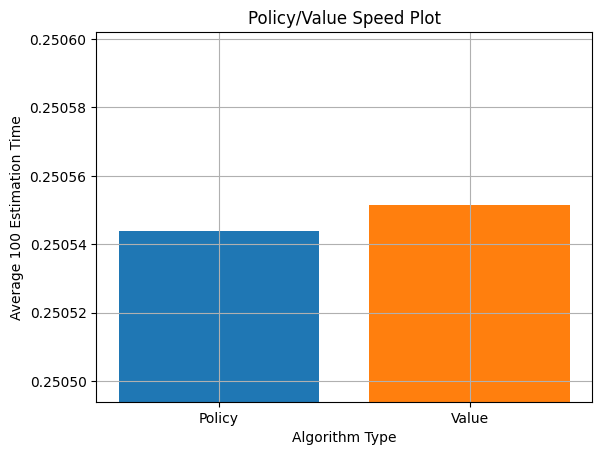

In [144]:

plt.bar("Policy",averageTimePolicy)
plt.bar("Value",averageTimeValue)
MARGIN = 0.00005
plt.ylim(round(min(averageTimeValue,averageTimePolicy),6) - MARGIN ,round(max(averageTimeValue,averageTimePolicy),6) + MARGIN)
plt.xlabel("Algorithm Type")
plt.ylabel("Average 100 Estimation Time")
plt.title("Policy/Value Speed Plot")
plt.grid(True)


plt.show()

- Value iteration is a bit slower than policy iteration because it takes longer to converge becuse in policy iteration we converge when policy is constant between two policy improvement 

<a name='2'></a>
## Part 2: Q-Learning Algorithm

<a name='2-1'></a>
### Question 7:

<font size="5" color="blue">Q-Learning:</font>

Q-learning is algorithm to learn optimal policy from experience. it is a model-free RL algorithm.

It estimates Q(s,a) directly By interacting with the environment with these steps:

- a) Observe current state s

- b) Select and take action a

- c) Observe reward R and next state s'

- d)Update Q(s,a):

\begin{equation}
Q(s,a) = Q(s,a) + α * (R + γ * \max_{a'}Q(s', a') - Q(s,a))
\end{equation}

By iteratively updating the Q-values using the Bellman equation, the Q function converges to the optimal Q through experience.

In [149]:
# hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 248

In [150]:
# environment
env = gym.make('Taxi-v3',render_mode="human")
Initial_State = env.reset(seed=STUDENT_NUM)
Initial_State

(326, {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})

In [151]:
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(Initial_State[0])
taxi_row, taxi_col, pass_idx, dest_idx

(3, 1, 1, 2)

In [152]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.render()

you can see the environment in each step by render command :


In [153]:
# Total no. of states
TOTAL_NUM_OF_STATE = env.observation_space.n

In [154]:
# Total no. of actions
env.action_space.n

6

<a name='2-1'></a>
### Question 8:

In [155]:
class QLearningAgent():
    
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
      self.env = env
      self.epsilon = epsilon
      self.learning_rate = learning_rate
      self.olr = learning_rate
      self.discount_factor = discount_factor
      self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
      self.seed = seed
      self.epsilonDecreaseRate = 0.09
      self.learningRateDecrease = 0.004

    def choose_action(self, state):
      ### START CODE HERE ###
      # With probability epsilon, choose a random action
      action = 0
      if(random.random() < self.epsilon):
        action = random.randint(0,5)
      else:
        action = np.argmax(self.q_table[state])
      # Otherwise, choose the action with the highest Q-value

      ### END CODE HERE ###
      return action

    def update_q_table(self, state, action, nextState, reward):
      ### START CODE HERE ###
      # Calculate the new Q-value using the Q-learning formula
      maxNextQ = max(self.q_table[nextState])
      self.q_table[state][action] = self.q_table[state][action] + self.learning_rate * ((reward + (self.discount_factor * maxNextQ)) - self.q_table[state][action])
      ### END CODE HERE ###

    def decay_epsilon(self, episode):
      ### START CODE HERE ###
      self.epsilon = self.epsilon * (1/(1+(episode*self.epsilonDecreaseRate)))
      ### END CODE HERE ###

    def decrease_learning_rate(self, episode):
      ### START CODE HERE ###
      self.learning_rate = self.learning_rate - (self.learningRateDecrease*(1/(episode+1)))
      ### END CODE HERE ###

    def take_action(self, action):
      next_state, reward, done, _,_ = self.env.step(action)
      return next_state, reward, done

    def get_optimal_policy(self, state):
      return np.argmax(self.q_table[state])

    def get_q_values(self):
      return self.q_table

    def reset(self):
      self.learning_rate = self.olr
      return self.env.reset(seed=self.seed)
    

<a name='2-2'></a>
### Question 9:

In [156]:

def Train(number_of_episode,number_of_rep,epsilon,learning_rate,discount,is_Decay_learning_rate):
    env = gym.make('Taxi-v3')
    env.reset(seed=STUDENT_NUM)
    sumRewards = [0 for _ in range(number_of_episode)]
    agentHistory = []
    for rep in range(number_of_rep):
        rewardList = []
        agent = QLearningAgent(env,epsilon,learning_rate,discount,STUDENT_NUM)
        for episode in range(number_of_episode):
            episodeReward = 0
            Initial_state = env.reset()
            state = Initial_state[0]
            done = False
            while(not done):
                action = agent.choose_action(state)
                nextState,reward,done = agent.take_action(action)
                agent.update_q_table(state,action,nextState,reward)
                state = nextState
                episodeReward += reward
            agent.decay_epsilon(episode)
            if(is_Decay_learning_rate):
                agent.decrease_learning_rate(episode)    
            rewardList.append(episodeReward)
        agentHistory.append([copy.deepcopy(agent),rewardList[-1]])
        sumRewards = [reward1 + reward2 for reward1, reward2 in zip(sumRewards, rewardList)]   
            
    averageRewards = [sumReward/REPS for sumReward in sumRewards]
    agentHistory.sort(key=lambda x: x[1])
    bestAgent = agentHistory[-1][0]
    env.close()
    return bestAgent,averageRewards

startTimeTrain = time.time()
bestAgent,averageRewards = Train(EPISODES,REPS,EPSILON,LEARNING_RATE,DISCOUNT,is_Decay_learning_rate=False)
optimalSolution = [bestAgent.get_optimal_policy(i) for i in range(TOTAL_NUM_OF_STATE)]
trainTime = time.time() - startTimeTrain


In [157]:

     
startTimeTrainDecay = time.time()
bestAgentDecay,averageRewardsDecay = Train(EPISODES,REPS,EPSILON,LEARNING_RATE,DISCOUNT,is_Decay_learning_rate=True)
optimalSolutionDecay = [bestAgentDecay.get_optimal_policy(i) for i in range(TOTAL_NUM_OF_STATE)]
trainTimeDecay = time.time() - startTimeTrainDecay


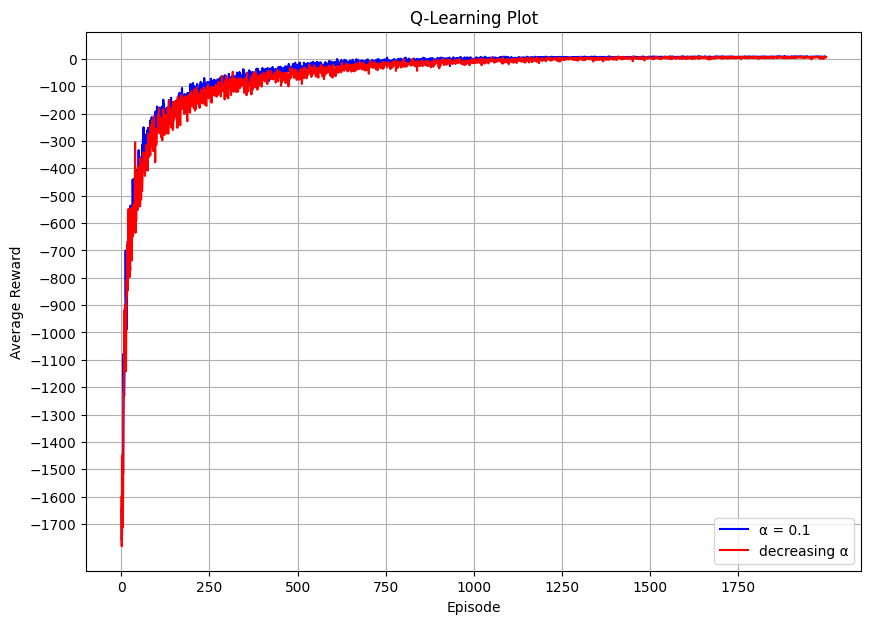

In [158]:
plt.figure(figsize=(10,7))
plt.plot(averageRewards,color = 'blue',label = "α = 0.1")
plt.plot(averageRewardsDecay,color = 'red' , label = "decreasing α")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Q-Learning Plot")
plt.grid(True)
plt.xticks(range(0, 2000, 250))
plt.yticks(range(-1700,100,100))
plt.legend()






plt.show()

- As you can see, the constant and decreasing methods for Q-learning do not have big differences in this project. This is because the starting learning rate α is set to 0.1, which is very low. With such a low learning rate, the agents struggle to find the optimal policy after α is decreased, because they can no longer learn effectively. The agents get stuck in a loop.

- To solve this problem without increasing the learning rate, I should set the amount that α decreases by to a very small number. That way, the learning rate decreases slowly over time.

- With the low starting α and minimal decrease amount, the results of the constant and decreasing methods end up being very similar

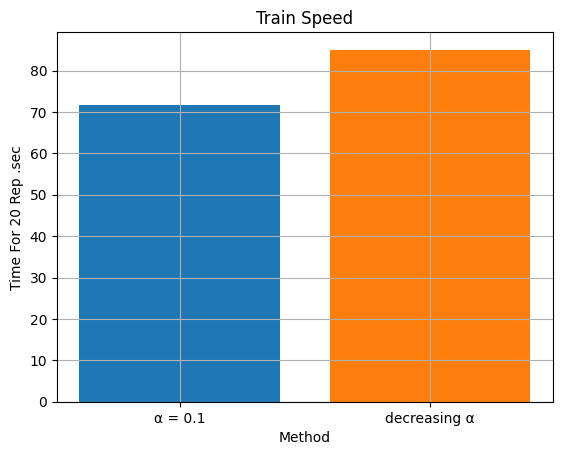

In [159]:
plt.bar("α = 0.1",trainTime)
plt.bar("decreasing α",trainTimeDecay)
plt.xlabel("Method")
plt.ylabel("Time For 20 Rep .sec")
plt.title("Train Speed")
plt.grid(True)




plt.show()

- As you can see, the constant learning rate method converges faster than the decreasing learning rate method. This is because, as I mentioned previously, the constant method maintains a higher learning rate throughout training compared to the decreasing method, where the rate decays over time

- I tested using a larger learning rate value, and the convergence speed of both methods doubled

In [160]:
print("Last episode average reward for α = 0.1 : ",averageRewards[-1])
print("Last episode average reward for decreasing α : ",averageRewardsDecay[-1])


Last episode average reward for α = 0.1 :  6.95
Last episode average reward for decreasing α :  6.55


- average of last episode reward in  α = 0.1 better than decreasing α

<font color=lightblue>Epsilon Decreasing Method:</font>

I used this equation to decrease epsilon over time because I want epsilon to be higher in the initial episodes and decrease towards zero in later episodes. A higher epsilon encourages more exploration early on when the policy is unreliable. As the policy improves and gets closer to optimal during training, I can decrease epsilon since the policy needs less random exploration.

$$\epsilon_{t+1} = \epsilon_t \cdot \frac{1}{1 + (episode \cdot k)}$$

k : decrasing epsilon rate

<a name='2-3'></a>
### Question 10:

In [145]:
def ShowOptimalSolution(optimal_solution):
    env = gym.make('Taxi-v3',render_mode = "human")
    initialState = env.reset(seed=STUDENT_NUM)
    newAgent = QLearningAgent(env,EPSILON,LEARNING_RATE,DISCOUNT,STUDENT_NUM)
    state = initialState[0]
    finish = False
    while(not finish):
        nextState,reward,finish = newAgent.take_action(optimal_solution[state])
        state = nextState
    env.close()

optimal solution for constant learning rate :

In [163]:
ShowOptimalSolution(optimalSolution)


optimal solution for decreasing learning rate :

In [164]:
ShowOptimalSolution(optimalSolutionDecay)